In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%run hypothesis.ipynb
%run cost_function.ipynb

In [14]:
datafile = "ex2data1.txt"
#!head $datafile
# read first file with student results
marksData = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
# transpose student marks matrix
x = np.transpose(np.array(marksData[:-1]))
# transpose student result vector
y = np.transpose(np.array(marksData[-1:]))
m = y.size # number of training examples
# insert column of one into students marks matrix
x = np.insert(x,0,1,axis=1)

In [15]:
#Divide the sample into two: ones with positive classification, one with null classification
accepted = np.array([x[i] for i in range(m) if y[i] == 1])
notAccepted = np.array([x[i] for i in range(m) if y[i] == 0])

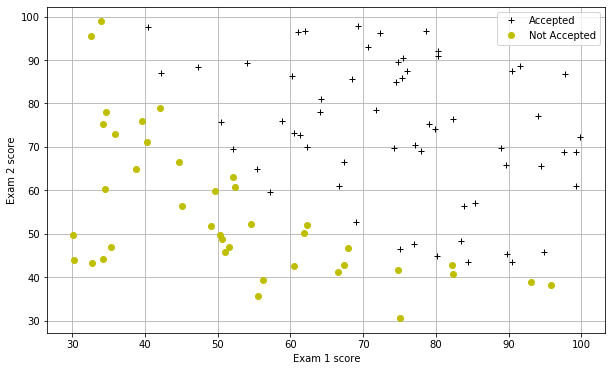

In [16]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(accepted[:,1],accepted[:,2],'k+',label='Accepted')
    plt.plot(notAccepted[:,1],notAccepted[:,2],'yo',label='Not Accepted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plotData()

In [17]:
initial_theta = np.zeros((x.shape[1],1))
computeCost(initial_theta, x, y)

0.6931471805599453

In [18]:
#http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin.html
from scipy import optimize

def optimizeTheta(theta, x, y, lambd=0.):
    result = optimize.fmin(computeCost, x0=theta, args=(x, y, lambd), maxiter=400, full_output=True)
    return result[0], result[1]

theta, mincost = optimizeTheta(initial_theta, x, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [19]:
#Calling cost function with optimized theta
computeCost(theta, x, y)

0.20349770159021513

In [20]:
def makePrediction(theta, x):
    return hypothesis(theta,x) >= 0.5

#Compute the percentage of samples I got correct:
accepted_correct = float(np.sum(makePrediction(theta,accepted)))
notAccepted_correct = float(np.sum(np.invert(makePrediction(theta,notAccepted))))
total = len(accepted)+len(notAccepted)
predictedCorrect = float(accepted_correct+notAccepted_correct)/total
"Total correctly predicted: %f." % predictedCorrect

'Total correctly predicted: 0.890000.'

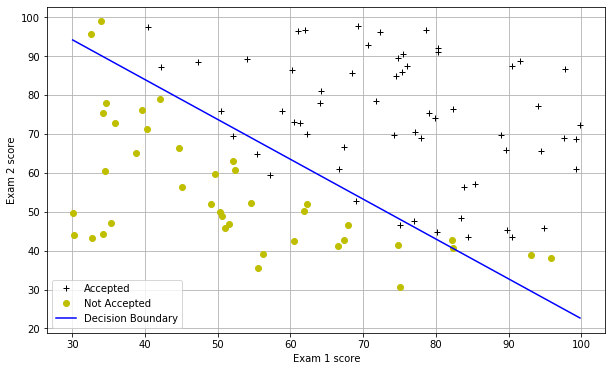

In [21]:
#theta0 + theta1*x1 + theta2*x2 = 0
#y=x+b is replaced by x2 = (-1/theta2)(theta0 + theta1*x1)

boundary_xs = np.array([np.min(x[:,1]), np.max(x[:,1])])
boundary_ys = (-1./theta[2])*(theta[0] + theta[1]*boundary_xs)
plotData()
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()